# Practicing Implementation of Gradient Descent Algorithm for Linear Regression

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

Let's use the same two data points as before - a house with 1000 square feet sold for \\$300,000 and a house with 2000 square feet sold for \\$500,000.

| Size (1000 sqft)     | Price (1000s of dollars) |
| ----------------| ------------------------ |
| 1               | 300                      |
| 2               | 500                      |

In [2]:
X_train=np.array([1,2])  #size of houses in square-feet
Y_train=np.array([300,500])

### Understanding how the algorithm actually works 
1. First we split the data into x_train and y_train
2. Total of 4 Functions are needed : To `compute_function(x,w,b)`,`cost_funct(x_vec,y-vec,b,w)`,`gradient(x_vec,y_vec,w,b)`,`descent_algo(x,y,learning_rate,iterations)`
3. All these functions are must and must be executed as specified 
4. Plotting the learning curve if also important to understand whether Gradient Descent Algorithm is working properly 
5. Learning rate can be set by analysing the Learning Curve and it's variation 
    

In [3]:
# Defining the Prediction Function 
def compute_function(x,w,b):
    f_wb=x*w+b
    return f_wb


In [58]:
# Defining the Cost-Function
def cost_function(x,y,w,b):
    # Initilising with the initial value of w and b 
    # w_init=0
    # b_init=0
    # Declaring the size of the Tuple 
    m=x.shape[0]
    f_wb=np.zeros(m)
    cost=0.0
    for i in range(m):
        f_wb[i]=compute_function(x[i],w,b)
        temp=(f_wb[i]-y[i])**2
        temp=temp/(2*m)
        cost = cost+ temp
    return cost


**Writing a Seperate Method to calculate Gradient for given parameters** \
This is Because the gradient descent algorithm calculate the derivative with updated parameters for each iteration

In [59]:
# Calculating the Gradient 
def gradient(x,y,w,b):
    df_dw=0
    df_db=0
    # We want the floating point representation
    m=x.shape[0]

    for i in range(m):
        df_dw_i=(((compute_function(x[i],w,b))-y[i])*x[i])/m
        df_db_i=(((compute_function(x[i],w,b))-y[i]))/m
        df_dw += df_dw_i
        df_db += df_db_i
    der=[df_dw,df_db]
    return der

In [60]:
#  Implementing the Gradient Descent Algorithm
def gradient_descent(x,y,alpha,iterations):
    # w=w-alphe*df_dw
    # b=b-alphe*df_db
    w_init=0
    b_init=0
    jw_val=[]
    # Using the Standad Value of Epsilon For iterations 
    for i in range(iterations):
        temp_w=w_init- alpha*gradient(x,y,w_init,b_init)[0]
        temp_b=b_init- alpha*gradient(x,y,w_init,b_init)[1]
        w_init=temp_w
        b_init=temp_b
        jw_val.append(cost_function(x,y,temp_w,temp_b))

    return w_init,b_init,jw_val

In [61]:
print(type(gradient_descent(X_train,Y_train,0.1,10000)))
print(gradient_descent(X_train,Y_train,0.1,10000))

<class 'tuple'>
(np.float64(199.9999999999991), np.float64(100.00000000000144), [np.float64(36731.25), np.float64(15877.265625), np.float64(6867.464765625002), np.float64(2974.7862325195297), np.float64(1292.8934389768071), np.float64(566.1426188404786), np.float64(252.04969997801044), np.float64(116.24169135612853), np.float64(57.46086242104911), np.float64(31.960145876394353), np.float64(20.83918547363745), np.float64(15.932313551094376), np.float64(13.711640998365713), np.float64(12.652969043845532), np.float64(12.097766766840465), np.float64(11.761503740522716), np.float64(11.521231740166298), np.float64(11.323812264759727), np.float64(11.146267464222902), np.float64(10.97865028498776), np.float64(10.816643741905665), np.float64(10.658363528753364), np.float64(10.502976624868193), np.float64(10.35010447861183), np.float64(10.199565156790765), np.float64(10.051261939828962), np.float64(9.905135186921623), np.float64(9.761141536192111), np.float64(9.619244914625524), np.float64(9.479

In [62]:
w_final=gradient_descent(X_train,Y_train,0.1,10000)[0]
b_final=gradient_descent(X_train,Y_train,0.1,10000)[1]
print(cost_function(X_train,Y_train,w_final,b_final))

1.050131637030211e-25


In [63]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars


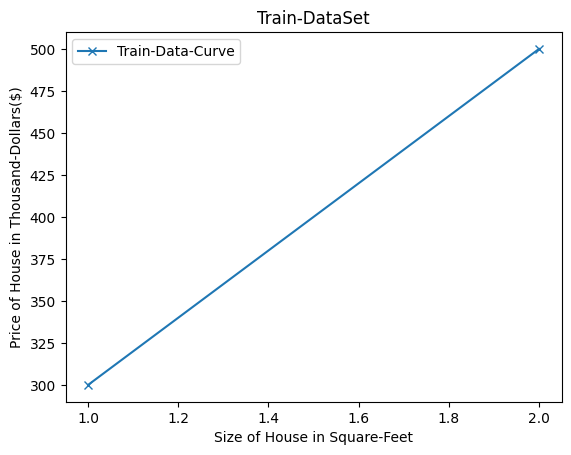

In [64]:
plt.title("Train-DataSet")
plt.xlabel("Size of House in Square-Feet")
plt.plot(X_train,Y_train,marker='x',)
plt.ylabel("Price of House in Thousand-Dollars($)")
plt.legend(['Train-Data-Curve']);

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (10,) and arg 1 with shape (10000,).

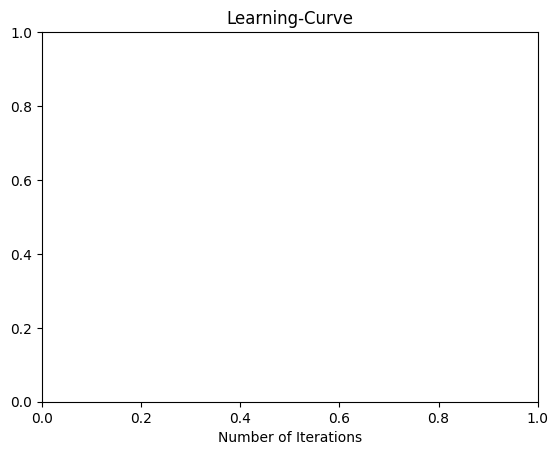

In [56]:
plt.title("Learning-Curve")
plt.xlabel("Number of Iterations")
plt.bar([0,1000,2000,3000,4000,5000,6000,7000,8000,9000],gradient_descent(X_train,Y_train,0.01)[2],marker='x',)
plt.ylabel("Price of House in Thousand-Dollars($)")
plt.legend(['Train-Data-Curve']);

In [52]:
# Calculating the learning Curve 
print(gradient_descent(X_train,Y_train,0.01)[2])
print(f"The length of the List is : {len(gradient_descent(X_train,Y_train,0.01)[2])}")

[np.float64(79274.8125), np.float64(73935.3097265625), np.float64(68955.50943163194), np.float64(64311.1797016098), np.float64(59979.72104335757), np.float64(55940.056413659375), np.float64(52172.52865702032), np.float64(48658.804852726775), np.float64(45381.78710571535), np.float64(42325.52934715345), np.float64(39475.15973987783), np.float64(36816.808311111134), np.float64(34337.53946031289), np.float64(32025.289013743764), np.float64(29868.80551944682), np.float64(27857.59549698345), np.float64(25981.872375505838), np.float64(24232.508871695347), np.float64(22600.992575835047), np.float64(21079.38452989538), np.float64(19660.280596071305), np.float64(18336.775427788), np.float64(17102.428867855553), np.float64(15951.234610264184), np.float64(14877.590973126262), np.float64(13876.273640544376), np.float64(12942.410240765836), np.float64(12071.456636919196), np.float64(11259.174814962144), np.float64(10501.612261242048), np.float64(9795.082729319178), np.float64(9136.14830246273), np.